In [1]:
from warnings import filterwarnings
filterwarnings(action="ignore")

import os
import numpy as np
import pandas as pd
from tqdm import tqdm

from sklearn.ensemble import RandomForestClassifier

pd.set_option("display.max_column", None)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

In [2]:
def LoadDF():
    df = []
    for i in os.listdir(os.getcwd()):
        if i.endswith(".csv"):
            df.append(pd.read_csv(i))
    return pd.concat(df, axis="rows")

In [6]:
combine_df = LoadDF()

In [7]:
combine_df.tail()

,Employment History,Employment Status,Age,Population estimate,Percentage within age and employment history,Percentage within age and employment status,Percentage within employment status and employment history,Country,Employment status,Percentage within country and employment history,Percentage within country and employment status,Ethnicity,Percentage within ethnicity and employment history,Percentage within ethnicity and employment status,Religion,Percentage within religion and employment history,Percentage within religion and employment status,Sex,Percentage within sex and employment history,Percentage within sex and employment status,Percentage within age,Percentage within employment history,Percentage within employment status,Percentage within religion,Percentage within sex,Percentage Estimate,Title,"Unemployment rate (aged 16 and over, seasonally adjusted): %"
898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023 OCT,3.9
899,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023 NOV,3.8
900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023 DEC,4.0
901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024 JAN,4.2
902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024 FEB,4.3


In [5]:
combine_df['Employment status'].value_counts()

Economically Inactive - Other                         1200
Unemployed                                             186
Economically Inactive - Student                        186
Economically Inactive - Looking After Family/Home      186
Economically Inactive - Long-term Sick or Disabled     186
Economically Inactive - Retired                        186
Name: Employment status, dtype: int64

In [8]:
combine_df['Employment status'].value_counts()

Economically Inactive - Other                         1200
Unemployed                                             186
Economically Inactive - Student                        186
Economically Inactive - Looking After Family/Home      186
Economically Inactive - Long-term Sick or Disabled     186
Economically Inactive - Retired                        186
Name: Employment status, dtype: int64

In [9]:
combine_df.isnull().sum()

Employment History                                               903
Employment Status                                               1536
Age                                                             1533
Population estimate                                              903
Percentage within age and employment history                    1572
Percentage within age and employment status                     1572
Percentage within employment status and employment history       996
Country                                                         2238
Employment status                                               1716
Percentage within country and employment history                2238
Percentage within country and employment status                 2238
Ethnicity                                                       1968
Percentage within ethnicity and employment history              1968
Percentage within ethnicity and employment status               1968
Religion                          

In [10]:
combine_df.shape

(3846, 28)

In [11]:
combine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3846 entries, 0 to 902
Data columns (total 28 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Employment History                                            2943 non-null   object 
 1   Employment Status                                             2310 non-null   object 
 2   Age                                                           2313 non-null   object 
 3   Population estimate                                           2943 non-null   float64
 4   Percentage within age and employment history                  2274 non-null   float64
 5   Percentage within age and employment status                   2274 non-null   float64
 6   Percentage within employment status and employment history    2850 non-null   float64
 7   Country                                                       1608 non

In [12]:
combine_df.columns

Index(['Employment History', 'Employment Status', 'Age', 'Population estimate',
       'Percentage within age and employment history',
       'Percentage within age and employment status',
       'Percentage within employment status and employment history', 'Country',
       'Employment status', 'Percentage within country and employment history',
       'Percentage within country and employment status', 'Ethnicity',
       'Percentage within ethnicity and employment history',
       'Percentage within ethnicity and employment status', 'Religion',
       'Percentage within religion and employment history',
       'Percentage within religion and employment status', 'Sex',
       'Percentage within sex and employment history',
       'Percentage within sex and employment status', 'Percentage within age',
       'Percentage within employment history',
       'Percentage within employment status', 'Percentage within religion',
       'Percentage within sex', 'Percentage Estimate', 'Title',


In [13]:
# Handle missing values
combine_df.fillna(method='ffill', inplace=True)

In [14]:
combine_df.describe()

,Population estimate,Percentage within age and employment history,Percentage within age and employment status,Percentage within employment status and employment history,Percentage within country and employment history,Percentage within country and employment status,Percentage within ethnicity and employment history,Percentage within ethnicity and employment status,Percentage within religion and employment history,Percentage within religion and employment status,Percentage within sex and employment history,Percentage within sex and employment status,Percentage within age,Percentage within employment history,Percentage within employment status,Percentage within religion,Percentage within sex,Percentage Estimate,"Unemployment rate (aged 16 and over, seasonally adjusted): %"
count,3.846000e+03,3846.000000,3846.000000,3846.000000,3612.000000,3612.000000,3576.000000,3576.000000,3234.000000,3234.000000,3072.000000,3072.000000,3036.000000,3036.000000,2997.000000,2979.000000,2952.000000,2946.000000,2943.000000
mean,1.395368e+06,9.744774,13.196100,33.066069,18.365449,33.790642,21.141051,45.437248,18.766419,33.123253,22.461003,36.621289,1.733136,45.944730,36.165566,15.234273,14.476965,13.141208,5.775025
std,1.400226e+06,9.572231,12.876931,25.594000,2.154516,2.945410,6.015094,10.517675,4.330242,6.490190,2.554499,3.191969,6.216191,9.082145,2.282888,3.454999,1.772461,1.298856,2.196479
min,5.000000e+01,0.000000,0.500000,0.000000,2.400000,3.000000,0.500000,1.800000,1.200000,2.700000,2.500000,3.300000,0.900000,0.400000,3.400000,10.000000,12.100000,13.100000,3.400000
25%,1.727500e+04,8.200000,8.700000,2.600000,18.400000,33.800000,22.200000,48.300000,19.000000,33.100000,22.600000,36.700000,0.900000,48.000000,36.200000,14.900000,14.400000,13.100000,4.300000
50%,7.082825e+05,8.200000,8.700000,53.900000,18.400000,33.800000,22.200000,48.300000,19.000000,33.100000,22.600000,36.700000,0.900000,48.000000,36.200000,14.900000,14.400000,13.100000,4.500000
75%,2.729755e+06,8.200000,8.700000,53.900000,18.400000,33.800000,22.200000,48.300000,19.000000,33.100000,22.600000,36.700000,0.900000,48.000000,36.200000,14.900000,14.400000,13.100000,6.900000
max,1.276298e+07,97.400000,83.800000,96.000000,68.100000,84.000000,76.400000,83.600000,78.400000,83.700000,71.600000,83.200000,82.900000,67.900000,82.400000,70.700000,62.400000,61.400000,11.900000


In [15]:
combine_df.columns

Index(['Employment History', 'Employment Status', 'Age', 'Population estimate',
       'Percentage within age and employment history',
       'Percentage within age and employment status',
       'Percentage within employment status and employment history', 'Country',
       'Employment status', 'Percentage within country and employment history',
       'Percentage within country and employment status', 'Ethnicity',
       'Percentage within ethnicity and employment history',
       'Percentage within ethnicity and employment status', 'Religion',
       'Percentage within religion and employment history',
       'Percentage within religion and employment status', 'Sex',
       'Percentage within sex and employment history',
       'Percentage within sex and employment status', 'Percentage within age',
       'Percentage within employment history',
       'Percentage within employment status', 'Percentage within religion',
       'Percentage within sex', 'Percentage Estimate', 'Title',


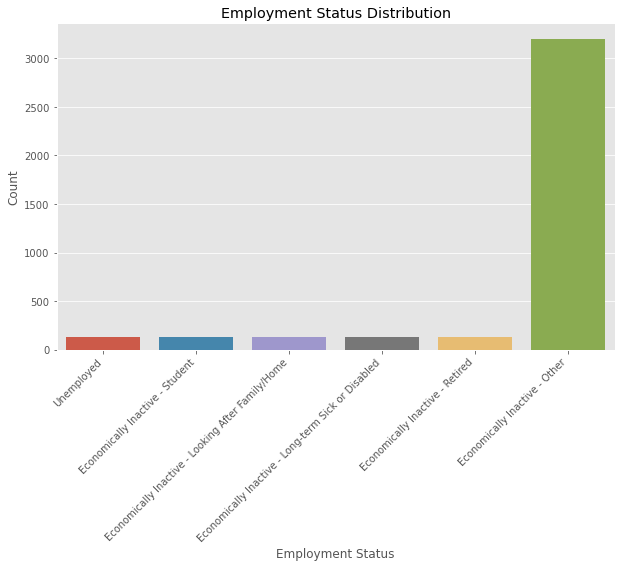

In [16]:
# Example: Employment status distribution with rotated x-axis labels
plt.figure(figsize=(10, 6))
sns.countplot(x='Employment Status', data=combine_df)
plt.title('Employment Status Distribution')
plt.xticks(rotation=45, ha='right') # Rotate the x-axis labels for better readability
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.show()

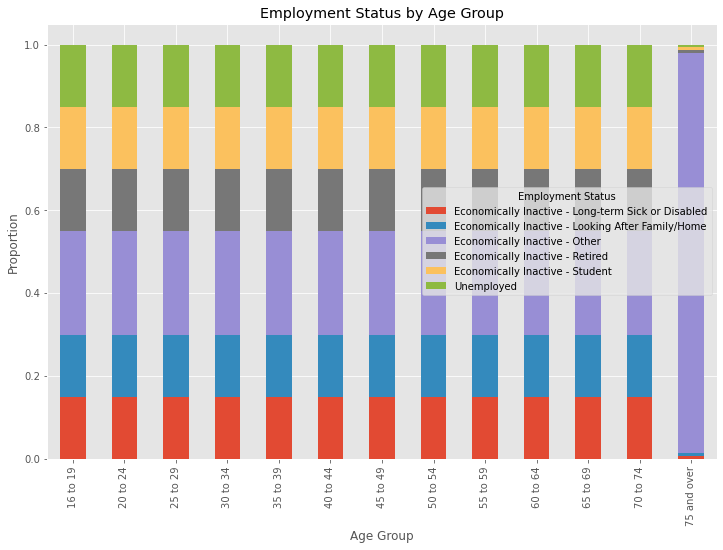

In [18]:
# Cross-tabulation example: Employment status by age group
employment_by_age = pd.crosstab(combine_df['Age'], combine_df['Employment Status'], normalize='index')
employment_by_age.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Employment Status by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.show()

In [19]:
combine_df.columns

Index(['Employment History', 'Employment Status', 'Age', 'Population estimate',
       'Percentage within age and employment history',
       'Percentage within age and employment status',
       'Percentage within employment status and employment history', 'Country',
       'Employment status', 'Percentage within country and employment history',
       'Percentage within country and employment status', 'Ethnicity',
       'Percentage within ethnicity and employment history',
       'Percentage within ethnicity and employment status', 'Religion',
       'Percentage within religion and employment history',
       'Percentage within religion and employment status', 'Sex',
       'Percentage within sex and employment history',
       'Percentage within sex and employment status', 'Percentage within age',
       'Percentage within employment history',
       'Percentage within employment status', 'Percentage within religion',
       'Percentage within sex', 'Percentage Estimate', 'Title',


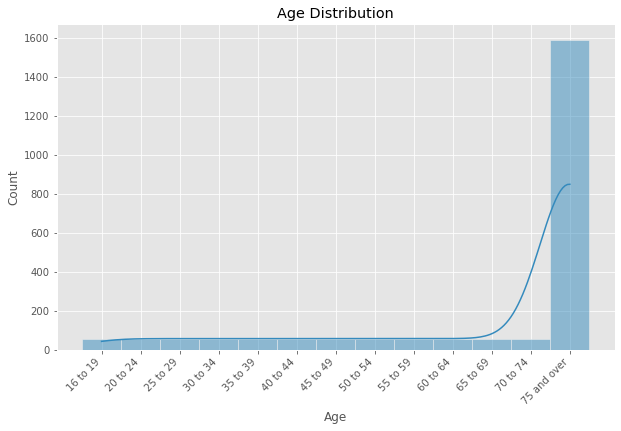

In [20]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(total_df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [21]:
combine_df['Age'].value_counts()

75 and over    3126
16 to 19         60
20 to 24         60
25 to 29         60
30 to 34         60
35 to 39         60
40 to 44         60
45 to 49         60
50 to 54         60
55 to 59         60
60 to 64         60
65 to 69         60
70 to 74         60
Name: Age, dtype: int64

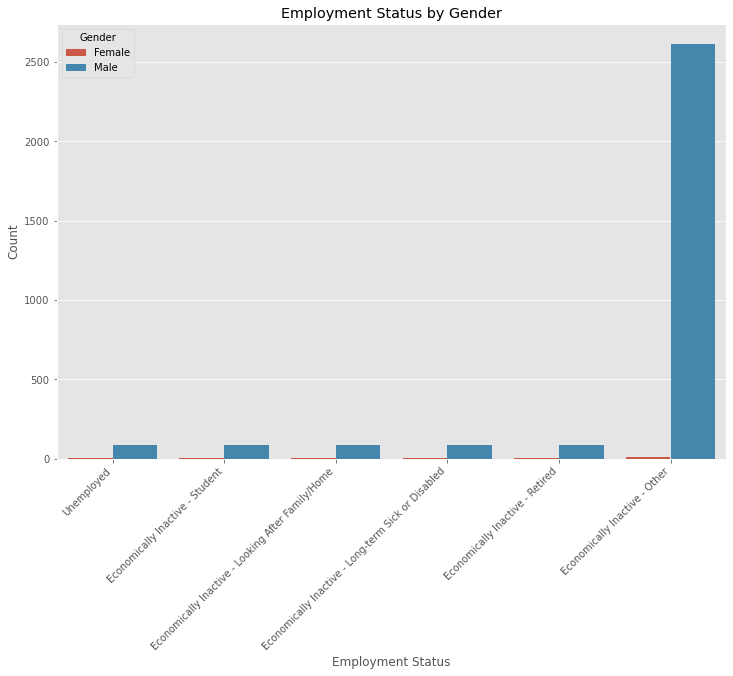

In [22]:
# Employment status by gender
plt.figure(figsize=(12, 8))
sns.countplot(x='Employment Status', hue='Sex', data=combine_df)
plt.title('Employment Status by Gender')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()


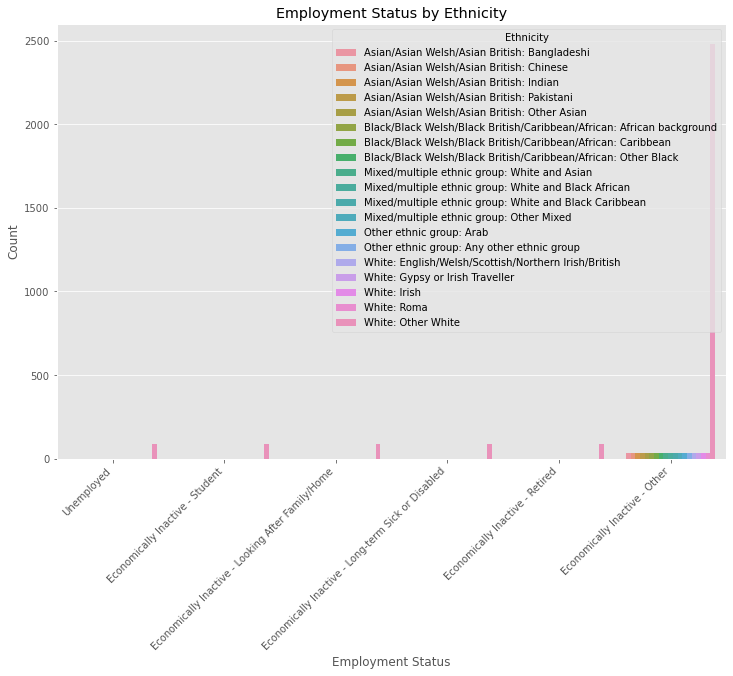

In [23]:
# Employment status by ethnicity
plt.figure(figsize=(12, 8))
sns.countplot(x='Employment Status', hue='Ethnicity', data=combine_df)
plt.title('Employment Status by Ethnicity')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.legend(title='Ethnicity')
plt.show()


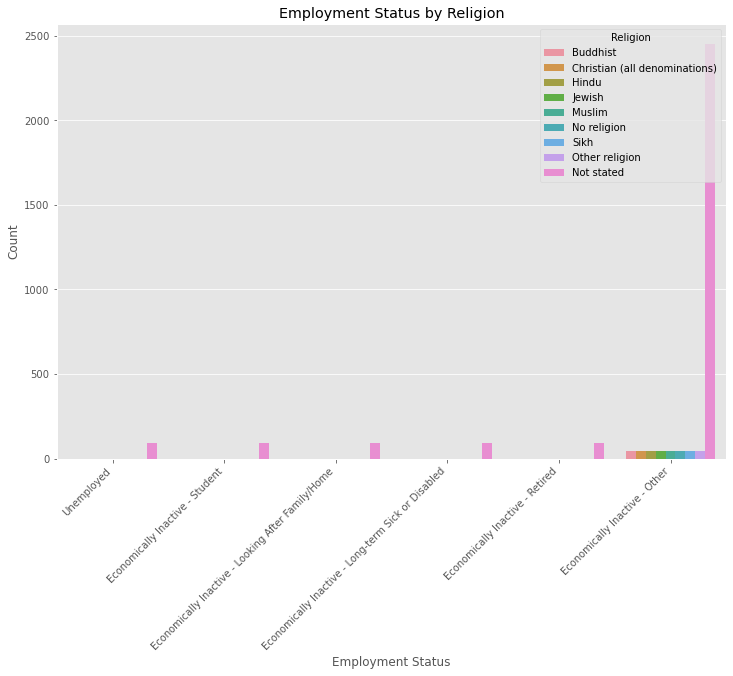

In [24]:
# Employment status by religion
plt.figure(figsize=(12, 8))
sns.countplot(x='Employment Status', hue='Religion', data=combine_df)
plt.title('Employment Status by Religion')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.legend(title='Religion')
plt.show()


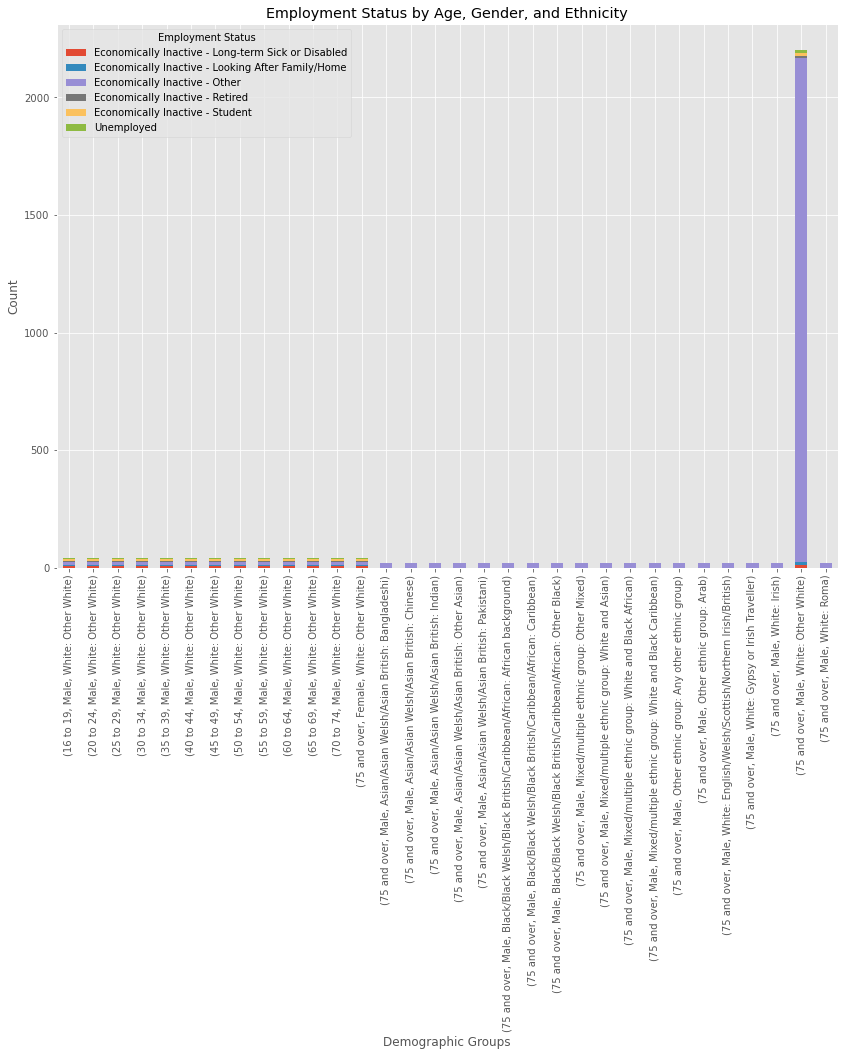

In [25]:
# Employment status by age, gender, and ethnicity
age_gender_ethnicity = pd.crosstab(index=[combine_df['Age'], combine_df['Sex'], combine_df['Ethnicity']], columns=combine_df['Employment Status'])
age_gender_ethnicity.plot(kind='bar', stacked=True, figsize=(14, 10))
plt.title('Employment Status by Age, Gender, and Ethnicity')
plt.xlabel('Demographic Groups')
plt.ylabel('Count')
plt.legend(title='Employment Status')
plt.show()

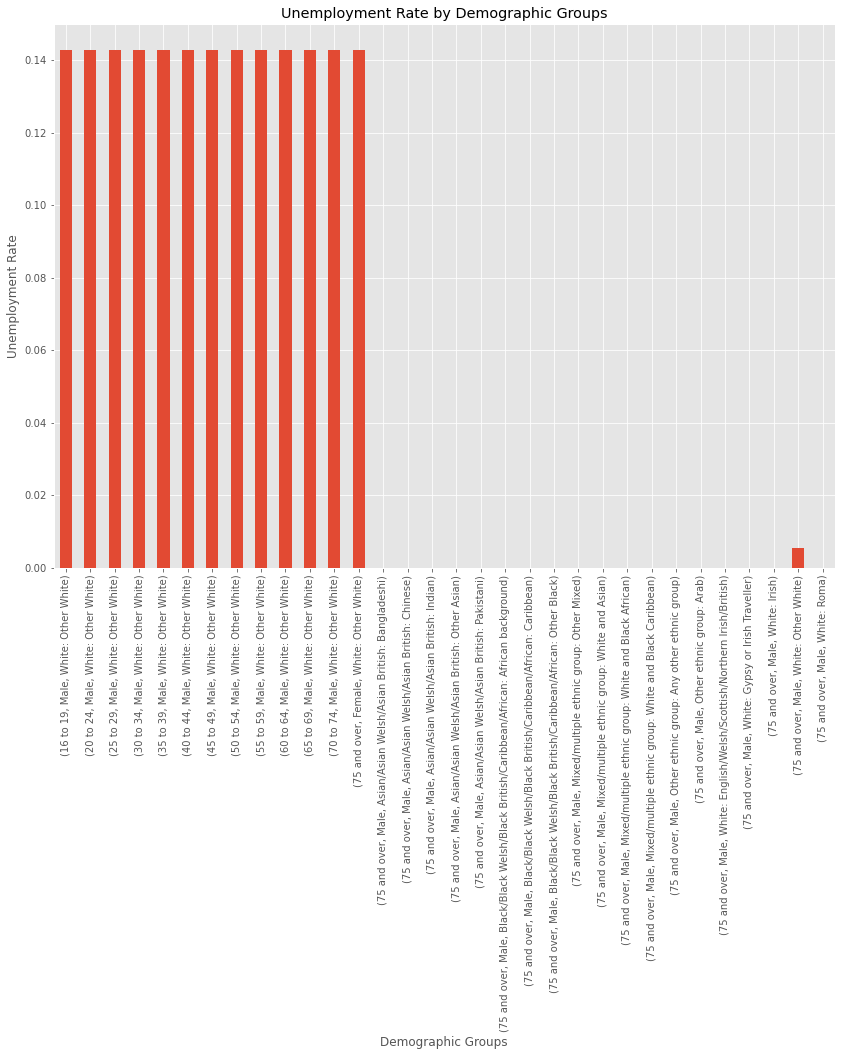

In [27]:
# Unemployment rate by demographic groups
unemployment_rate = combine_df[total_df['Employment Status'] == 'Unemployed'].groupby(['Age', 'Sex', 'Ethnicity']).size() / combine_df.groupby(['Age', 'Sex', 'Ethnicity']).size()
unemployment_rate.plot(kind='bar', figsize=(14, 10))
plt.title('Unemployment Rate by Demographic Groups')
plt.xlabel('Demographic Groups')
plt.ylabel('Unemployment Rate')
plt.show()

In [28]:
combine_df.columns

Index(['Employment History', 'Employment Status', 'Age', 'Population estimate',
       'Percentage within age and employment history',
       'Percentage within age and employment status',
       'Percentage within employment status and employment history', 'Country',
       'Employment status', 'Percentage within country and employment history',
       'Percentage within country and employment status', 'Ethnicity',
       'Percentage within ethnicity and employment history',
       'Percentage within ethnicity and employment status', 'Religion',
       'Percentage within religion and employment history',
       'Percentage within religion and employment status', 'Sex',
       'Percentage within sex and employment history',
       'Percentage within sex and employment status', 'Percentage within age',
       'Percentage within employment history',
       'Percentage within employment status', 'Percentage within religion',
       'Percentage within sex', 'Percentage Estimate', 'Title',
